In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('data/adult.csv', na_values='?')

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [5]:
df = df[~(df['workclass'].isna())]
df = df[~(df['occupation'].isna())]
df = df[~(df['native-country'].isna())]

In [19]:
df.workclass.index

Index([    0,     1,     2,     3,     5,     7,     8,     9,    10,    11,
       ...
       48832, 48833, 48834, 48835, 48836, 48837, 48838, 48839, 48840, 48841],
      dtype='int64', length=45222)

In [29]:
workclass = df[['workclass']].groupby('workclass')['workclass'].count().reset_index(name="count")

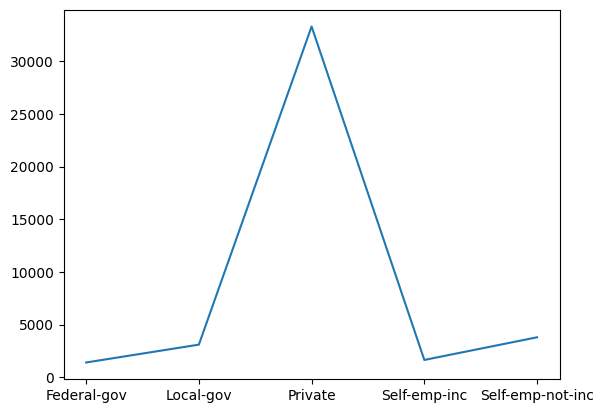

In [37]:
plt.plot(workclass['workclass'][:5], workclass['count'][:5])
plt.show()

In [58]:
x = pd.get_dummies(df, columns=['workclass', 'education', 'relationship', 'marital-status', 'occupation', 'race', 'gender','native-country'])
del x['income']

In [51]:
x

,age,fnlwgt,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,...,education_Masters,education_Preschool,education_Prof-school,education_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,...,False,False,False,False,True,False,False,False,False,False
2,28,336951,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,...,False,False,False,False,True,False,False,False,False,False
3,44,160323,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,...,False,False,False,True,True,False,False,False,False,False
5,34,198693,6,Never-married,Other-service,White,Male,0,0,30,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,...,False,False,False,False,False,False,False,False,False,True
48838,40,154374,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,...,False,False,False,False,True,False,False,False,False,False
48839,58,151910,9,Widowed,Adm-clerical,White,Female,0,0,40,...,False,False,False,False,False,False,False,False,True,False
48840,22,201490,9,Never-married,Adm-clerical,White,Male,0,0,20,...,False,False,False,False,False,False,False,True,False,False


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
le.fit(df['income'])

LabelEncoder()

In [42]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [43]:
le.transform(['<=50K', '>50K', '<=50K'])

array([0, 1, 0])

In [44]:
y = pd.Series(data=le.transform(df['income']))

In [45]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [62]:
predictions[:100]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
model.score(X_train, y_train)

0.8485778256903558

In [64]:
model.score(X_test,y_test)

0.8509673852957435

In [65]:
clf = make_pipeline(StandardScaler(), SVC())

In [66]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [67]:
clf.score(X_train, y_train)

0.8586118251928021

In [68]:
clf.score(X_test, y_test)

0.8512990602542841